In [1]:
import torch
import numpy as np
from torch2jax import j2t,t2j
import jax
import sys,os
from brax.io.torch import jax_to_torch 
import time
import copy

os.environ['CUDA_VISIBLE_DEVICES'] ='1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.25'

import jax.numpy as jnx

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(os.path.abspath(os.getcwd()))

#jax.config.update("jax_default_device", jax.devices()[2])

from ensemble.ensemble import EnsembleModels

from Trajectory.walker_mpc import Walker_MPC


In [2]:
f_size = (8.0,6.0)
l_wid = 3
t_size = 24
lable_size = 28


In [3]:
from matplotlib import pyplot as plt

In [4]:
cartpole_gt = np.load('../Data/Cartpole/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Cartpole/MAE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,52,2):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)
print('gt',cartpole_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('MAE', results_MAE[-1],std_MAE[-1])

gt 148.63144
ours 130.6829 2.0580544
BT 52.28353 26.828945
MAE 99.54247 30.669579


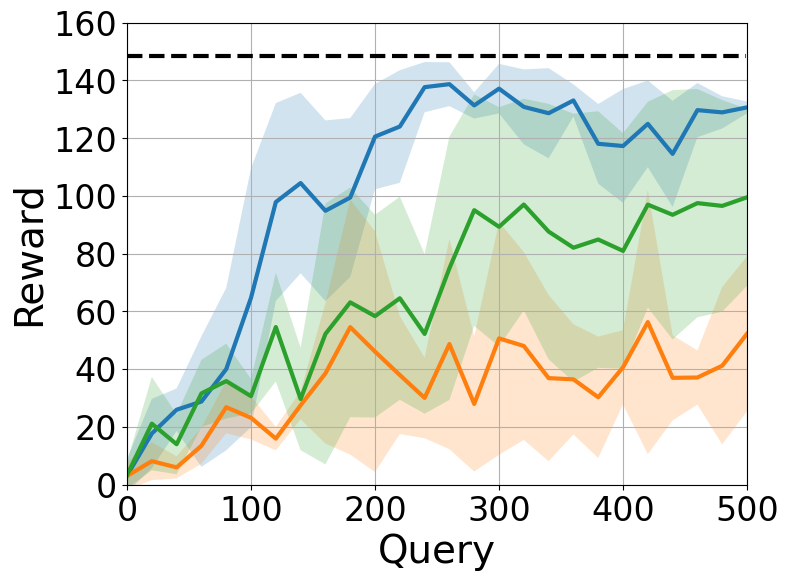

In [6]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Cartpole reward: 20% Error")
#plt.title("Cartpole-Swingup",fontsize = 16)
plt.plot(np.arange(0,52,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,52,2)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,52,2)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)

plt.plot(np.ones(500)*cartpole_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,160)
plt.xlim(0,500)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_2/cartpole.jpg',bbox_inches="tight")
#plt.legend(fontsize=16)

In [10]:
walker_gt = np.load('../Data/Walker/gt.npy')
results_ours = []
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/RA/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/BT/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Walker/MAE/error_3/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,121,5):
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

print('gt',walker_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('MAE', results_MAE[-1],std_MAE[-1])

gt 472.99542
ours 417.1928 12.260955
BT 277.01343 62.29897
MAE 408.57892 43.091198


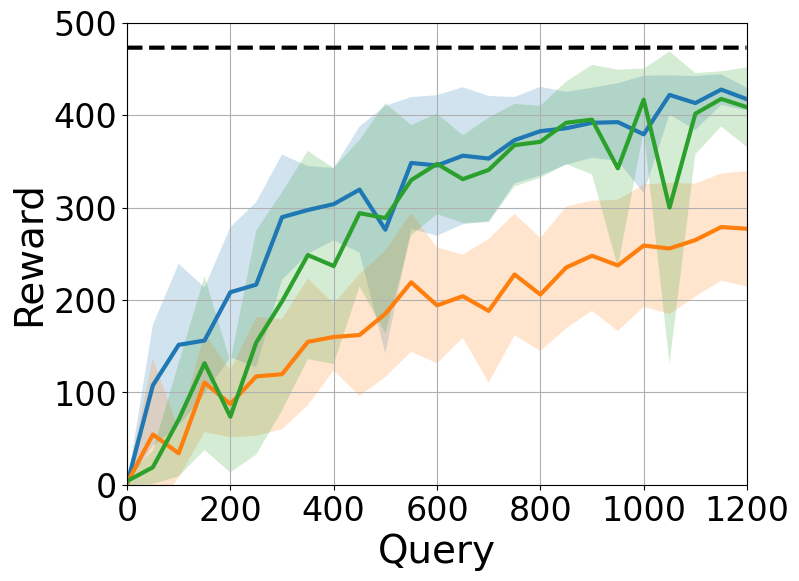

In [11]:
plt.figure(figsize=f_size)
#plt.title("Walker-Walk",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,121,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,121,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,121,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,121,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,121,5)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,121,5)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)


plt.plot(np.ones(1200)*walker_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(0,500)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)
plt.savefig('../Data/Figs/err_2/walker.jpg',bbox_inches="tight")

In [12]:
#humanoid
humanoid_gt = np.load('../Data/Humanoid_New/gt.npy')
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,151,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,151,5):
        #print(res[str(i)])
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

results_MAE = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Humanoid_New/MAE/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,151,5):
        #print(res[str(i)])
        results.append(res[str(i)])
    results_MAE.append(results)
std_MAE = np.std(results_MAE,axis=0)
results_MAE  = np.mean(results_MAE ,axis=0)

print('gt',humanoid_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])
print('MAE', results_MAE[-1],std_MAE[-1])

gt 206.70087
ours 117.87466 19.864058
BT 84.22075 15.195886
MAE 119.74751 42.90662


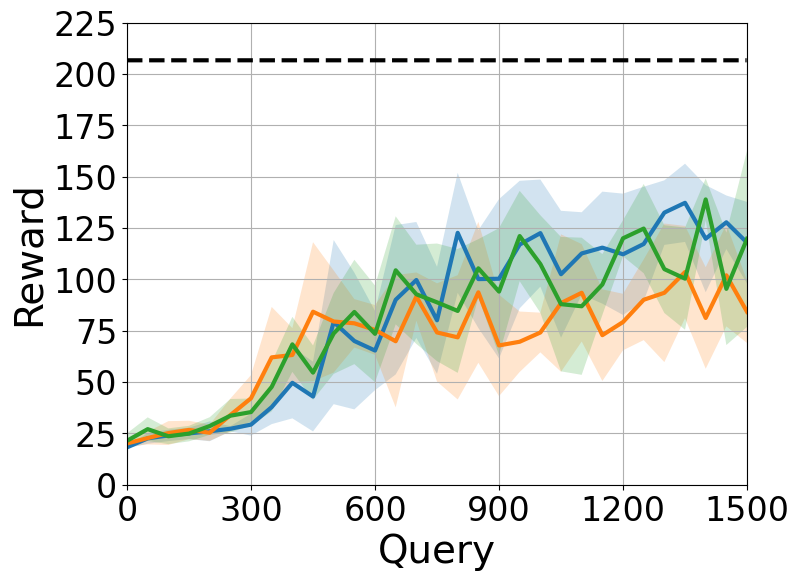

In [13]:
plt.figure(figsize=f_size)
#plt.title("Humanoid-Standup",fontsize = 16)
plt.grid()
plt.plot(np.arange(0,151,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,151,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
plt.plot(np.arange(0,151,5)*10,results_MAE,label='MAE',linewidth = l_wid)
plt.fill_between(np.arange(0,151,5)*10,results_MAE-std_MAE,results_MAE+std_MAE,alpha=0.2)

plt.plot(np.ones(1500)*humanoid_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(0,225)
plt.xlim(0,1500)
plt.xticks(np.linspace(0,1500,6),fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_2/humanoid.jpg',bbox_inches="tight")

In [670]:
#allegro
cube_gt = np.load("../Data/Allegro/Cube/gt.npy")
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/RA/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)


results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/BT/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cube_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1391674
ours -0.20734234 0.04266596
BT -0.28070912 0.080208845


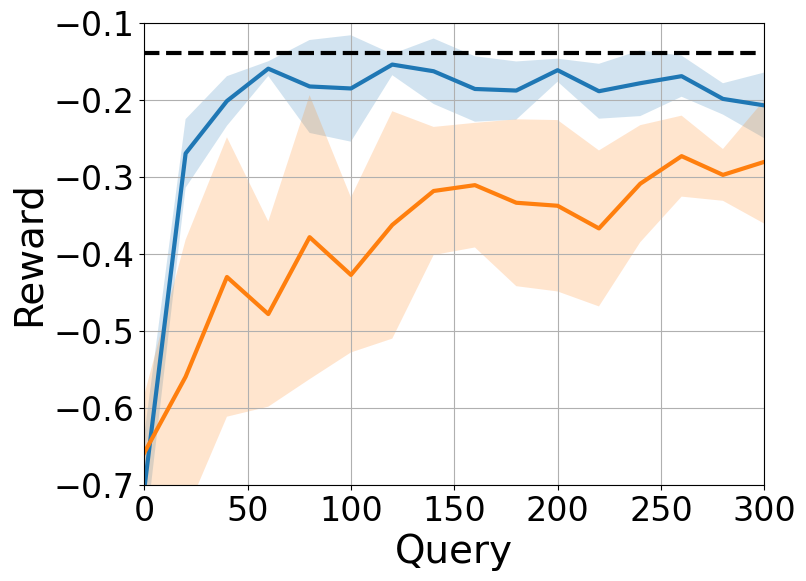

In [671]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Cube",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Cube: No Error")
plt.plot(np.arange(0,32,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,32,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()

plt.plot(np.ones(300)*cube_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(-0.7,-0.1)
plt.xlim(0,300)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_0/cube.jpg',bbox_inches="tight")


In [672]:
#allegro
bunny_gt = np.load("../Data/Allegro/Bunny/gt.npy")
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/RA/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_ours.append(results)

std_ours = np.std(results_ours,axis=0)   
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/BT/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,32,2):
        results.append(res[str(i)])
    results_BT.append(results)
    
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',bunny_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1552223
ours -0.21988502 0.037983753
BT -0.35190544 0.096361525


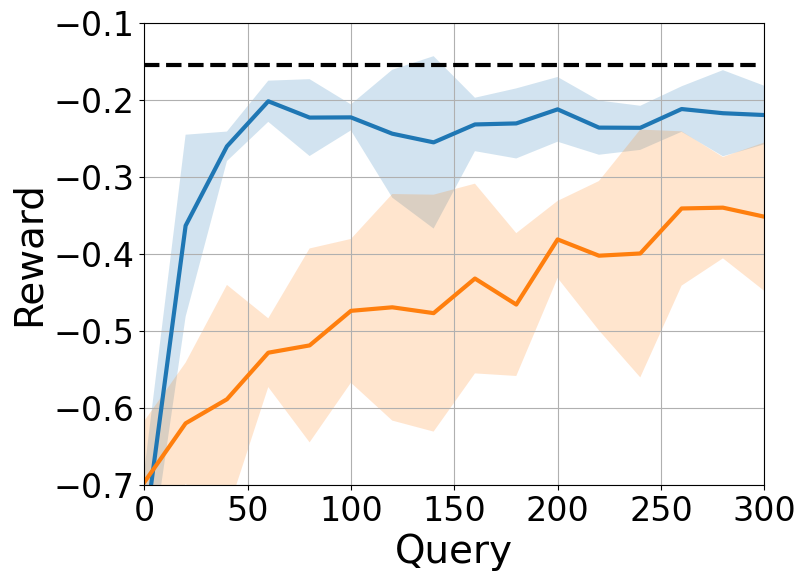

In [673]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Bunny",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Bunny: No Error")
plt.plot(np.arange(0,32,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,32,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,32,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(300)*bunny_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(-0.7,-0.1)
plt.xlim(0,300)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_0/bunny.jpg',bbox_inches="tight")


In [674]:
#allegro
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Cube/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',cube_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1391674
ours -0.23798037 0.06514765
BT -0.3599832 0.13109715


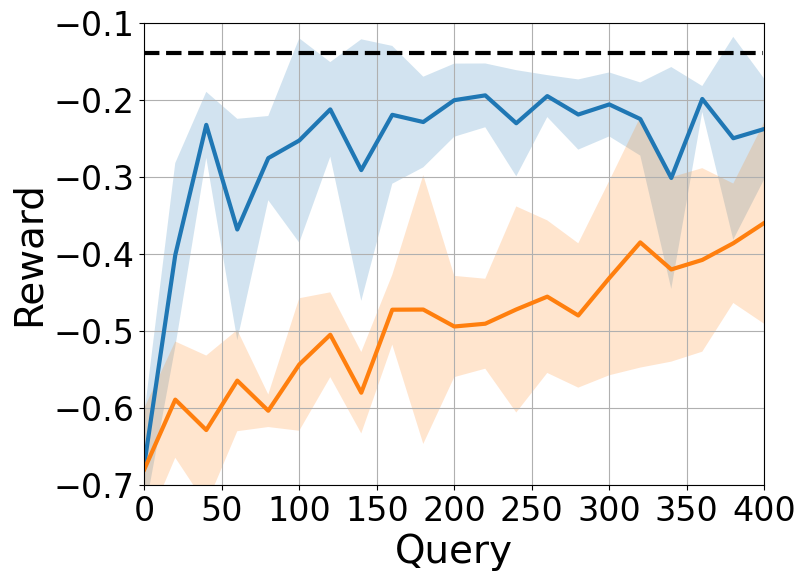

In [675]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Cube",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Cube: 20% Error")
plt.plot(np.arange(0,42,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,42,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(400)*cube_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)
plt.ylim(-0.7,-0.1)
plt.xlim(0,400)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_2/cube.jpg',bbox_inches="tight")

In [676]:
#allegro
results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT = [] 
for j in (0,1,2,3,4):
    res = np.load('../Data/Allegro/Bunny/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,42,2):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT  = np.mean(results_BT ,axis=0)

print('gt',bunny_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -0.1552223
ours -0.23586893 0.02561606
BT -0.4041689 0.101990454


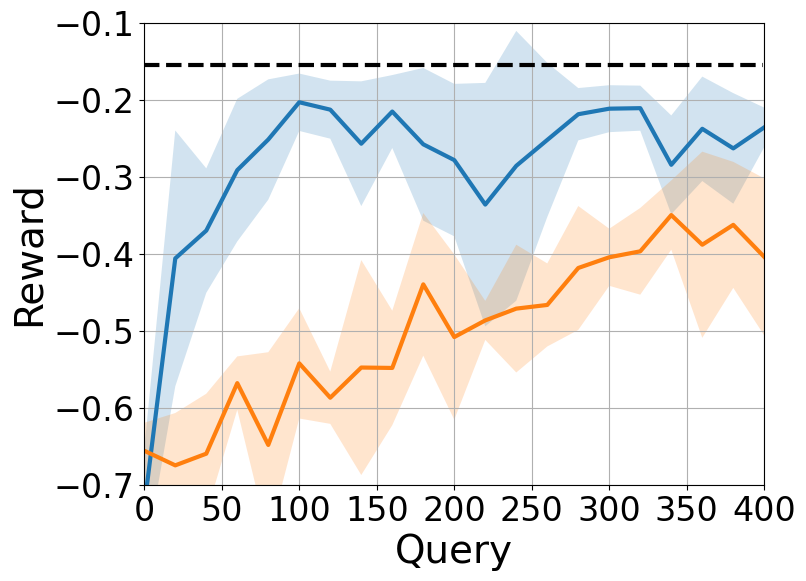

In [677]:
plt.figure(figsize=f_size)
#plt.title("Dexterous Manipulation-Bunny",fontsize = 16)
plt.grid()
#plt.title("Allegro reward Bunny: 20% Error")
plt.plot(np.arange(0,42,2)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,42,2)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,42,2)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)
#plt.legend()
plt.plot(np.ones(400)*bunny_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

plt.ylim(-0.7,-0.1)
plt.xlim(0,400)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_2/bunny.jpg',bbox_inches = "tight")

In [678]:
#go2
go2_gt = np.load('../Data/Go2_big/gt.npy')

results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/RA/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,85,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/BT/error_0/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,85,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT = np.mean(results_BT,axis=0)

print('gt',go2_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -30.646456
ours -43.90644 4.192062
BT -62.11678 22.87805


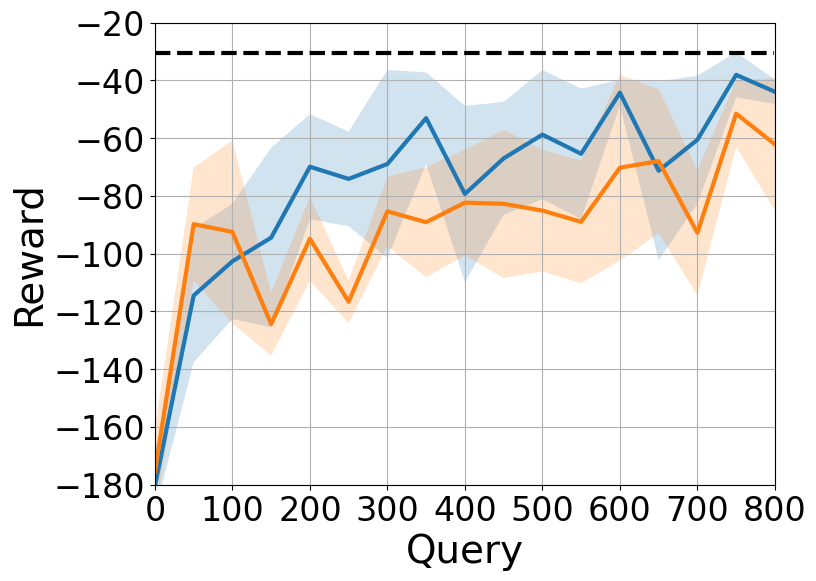

In [679]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Quadruped Locomotion",fontsize = 16)
plt.plot(np.arange(0,85,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,85,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,85,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,85,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(800)*go2_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(-180,-20)
plt.xlim(0,800)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_0/go2.jpg',bbox_inches='tight')

In [680]:

results_ours =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/RA/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,125,5):
        results.append(res[str(i)])
    results_ours.append(results)
std_ours = np.std(results_ours,axis=0)
results_ours = np.mean(results_ours,axis=0)

results_BT =[]
for j in (0,1,2,3,4):
    res = np.load('../Data/Go2_big/BT/error_2/run_{}/eval_result_0.npz'.format(j))
    results=[]
    for i in range(0,125,5):
        results.append(res[str(i)])
    results_BT.append(results)
std_BT = np.std(results_BT,axis=0)
results_BT = np.mean(results_BT,axis=0)

print('gt',go2_gt)
print('ours', results_ours[-1],std_ours[-1])
print('BT', results_BT[-1],std_BT[-1])

gt -30.646456
ours -75.56096 21.678946
BT -101.188835 17.941763


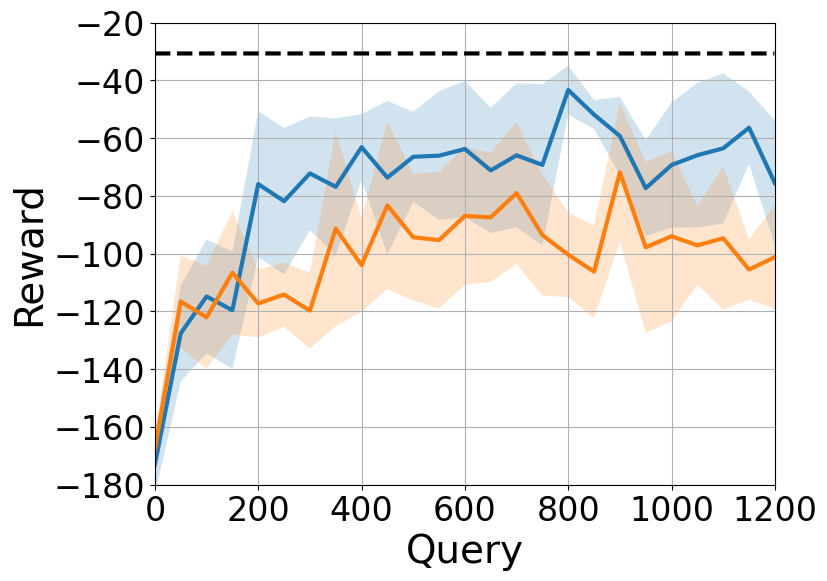

In [681]:
plt.figure(figsize=f_size)
plt.grid()
#plt.title("Quadruped Locomotion",fontsize = 16)
plt.plot(np.arange(0,125,5)*10,results_ours,label='Ours',linewidth = l_wid)
plt.fill_between(np.arange(0,125,5)*10,results_ours-std_ours,results_ours+std_ours,alpha=0.2)
plt.plot(np.arange(0,125,5)*10,results_BT,label='BT',linewidth = l_wid)
plt.fill_between(np.arange(0,125,5)*10,results_BT-std_BT,results_BT+std_BT,alpha=0.2)

plt.plot(np.ones(1200)*go2_gt,label='Oracle',linestyle='dashed', color = 'black',linewidth = l_wid)

#plt.legend()
plt.ylim(-180,-20)
plt.xlim(0,1200)
plt.xticks(fontsize = t_size)
plt.yticks(fontsize = t_size)
plt.xlabel("Query",fontsize = lable_size)
plt.ylabel("Reward",fontsize = lable_size)

plt.savefig('../Data/Figs/err_2/go2.jpg',bbox_inches='tight')

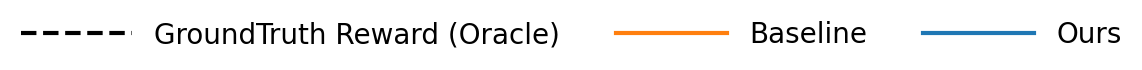

In [682]:
import matplotlib.lines as mlines

# Create a blank figure
fig, ax = plt.subplots(figsize=(8, 1))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Define legend items
legend_items = [
    mlines.Line2D([], [], color='black', linestyle='dashed', linewidth=3, label='GroundTruth Reward (Oracle)'),
    mlines.Line2D([], [], color='#ff7f0e', linewidth=3, label='Baseline'),
    mlines.Line2D([], [], color='#1f77b4', linewidth=3, label='Ours'),
]

# Add the legend to the figure
legend = ax.legend(handles=legend_items, loc='center', ncol=3, frameon=False, fontsize=20,handlelength=4,bbox_to_anchor=(0.5, 0.5),)
fig.subplots_adjust(top=0.3, bottom=0.1)
# Save or show the legend
#plt.tight_layout()
plt.savefig('../Data/Figs/legend_only.png', dpi=300, bbox_inches='tight', pad_inches=0.0)
plt.show()